In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import joblib

2025-10-15 10:55:31.367743: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-15 10:55:31.385239: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-15 10:55:32.194463: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-15 10:55:36.299296: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

--- Loading and Preprocessing Sequence Data ---
Found classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Final training data shape: (1200, 174, 25)


/home/manas/Desktop/ML_SpeechEmotion/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 174, 128)       │        28,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 174, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 87, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 87, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 43, 256)        │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 43, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 11008)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,818,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,737,096 (14.26 MB)

 Trainable params: 3,735,816 (14.25 MB)

 Non-trainable params: 1,280 (5.00 KB)


--- Training 1D CNN Model ---
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.2500 - loss: 2.6735 - val_accuracy: 0.2750 - val_loss: 1.8875 - learning_rate: 5.0000e-04
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4058 - loss: 1.6366 - val_accuracy: 0.4167 - val_loss: 1.7925 - learning_rate: 5.0000e-04
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4733 - loss: 1.3948 - val_accuracy: 0.3417 - val_loss: 1.6796 - learning_rate: 5.0000e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5342 - loss: 1.2562 - val_accuracy: 0.3917 - val_loss: 1.6354 - learning_rate: 5.0000e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5625 - loss: 1.1929 - val_accuracy: 0.3583 - val_loss: 1.6636 - learning_rate: 5.0000e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6575 - loss: 0.9318 - val_accuracy: 0.4167 - val_loss: 1.7687 - learning_rate: 5.0000e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━

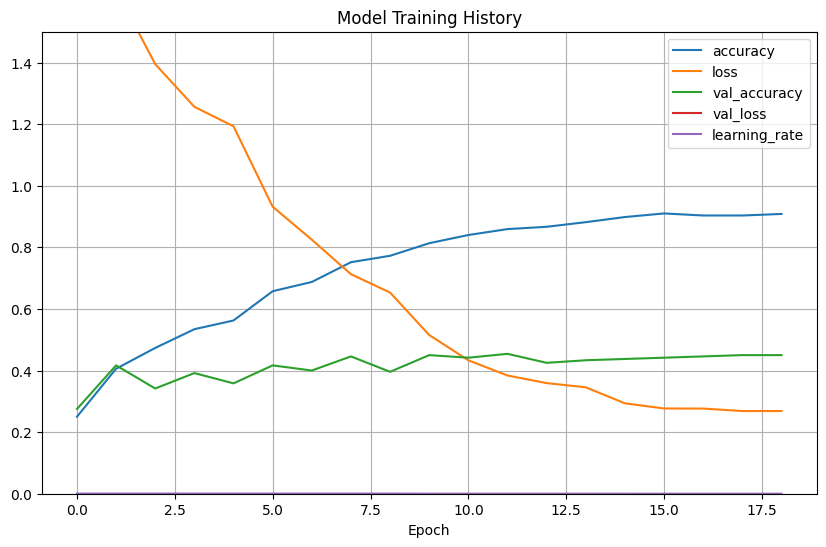


Test Accuracy (1D CNN on MFCC+Chroma): 39.17%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


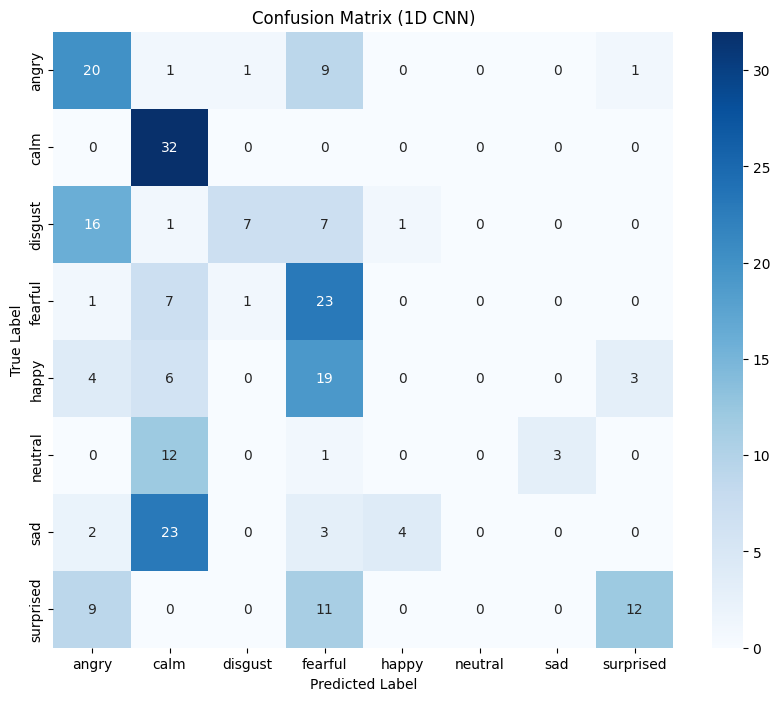

1D CNN model saved to cnn_1d_sequence_model.h5


In [ ]:
# Baseline

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'cnn_1d_sequence_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Found classes: {class_names}")
print(f"Final training data shape: {X_train.shape}")


def create_1d_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First block
    model.add(Conv1D(128, kernel_size=9, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Second block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    # A third block to learn even more abstract patterns
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    # We remove the final pooling layer here to preserve more of the sequence length
    model.add(Dropout(0.4))
    
    # Flatten and Classify
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# --- Training the Model ---
cnn_1d_model = create_1d_cnn_model(X_train.shape[1:], num_classes)
cnn_1d_model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

print("\n--- Training 1D CNN Model ---")
history = cnn_1d_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating 1D CNN Model ---")

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = cnn_1d_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (1D CNN on MFCC+Chroma): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(cnn_1d_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (1D CNN)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Saving the model
cnn_1d_model.save(MODEL_SAVE_PATH)
print(f"1D CNN model saved to {MODEL_SAVE_PATH}")

--- Loading and Preprocessing Sequence Data ---
Found classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Final training data shape: (1200, 174, 27)


/home/manas/Desktop/ML_SpeechEmotion/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 174, 128)       │        31,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 174, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 87, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 87, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 43, 256)        │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 43, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 11008)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,818,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,739,400 (14.26 MB)

 Trainable params: 3,738,120 (14.26 MB)

 Non-trainable params: 1,280 (5.00 KB)


--- Training 1D CNN Model ---
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.2233 - loss: 2.7597 - val_accuracy: 0.2042 - val_loss: 1.9199 - learning_rate: 5.0000e-04
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.2917 - loss: 1.9570 - val_accuracy: 0.2792 - val_loss: 1.8265 - learning_rate: 5.0000e-04
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3333 - loss: 1.7547 - val_accuracy: 0.3208 - val_loss: 1.7959 - learning_rate: 5.0000e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3783 - loss: 1.6208 - val_accuracy: 0.3750 - val_loss: 1.7402 - learning_rate: 5.0000e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4667 - loss: 1.4776 - val_accuracy: 0.3208 - val_loss: 1.6820 - learning_rate: 5.0000e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4842 - loss: 1.4213 - val_accuracy: 0.4042 - val_loss: 1.5761 - learning_rate: 5.0000e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━

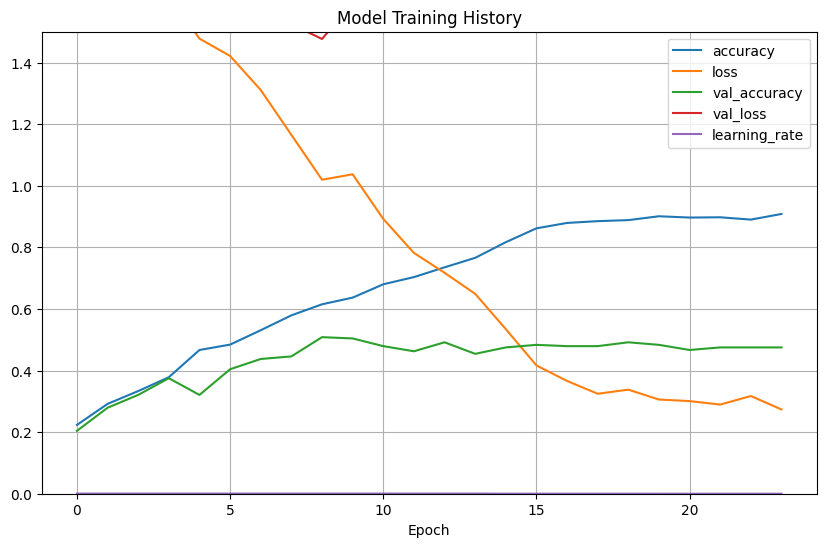


Test Accuracy (1D CNN on MFCC+Chroma): 50.83%


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


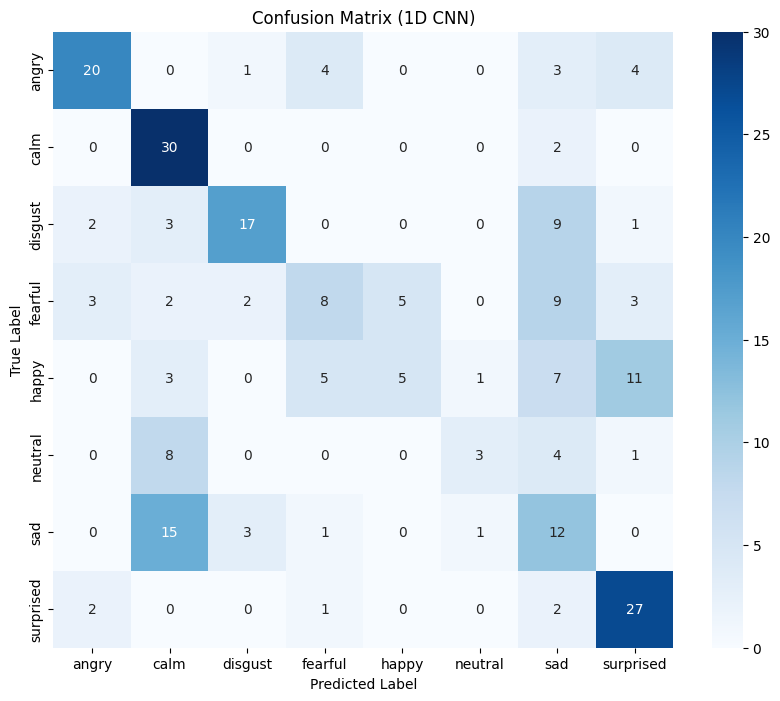

1D CNN model saved to cnn_1d_sequence_model.h5


In [ ]:
# After augmentation + zcr and rms.

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'cnn_1d_sequence_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Found classes: {class_names}")
print(f"Final training data shape: {X_train.shape}")


def create_1d_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First block
    model.add(Conv1D(128, kernel_size=9, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Second block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    # Third block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    # We remove the final pooling layer here to preserve more of the sequence length
    model.add(Dropout(0.4))
    
    # Flatten and Classify
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# --- Training the Model ---
cnn_1d_model = create_1d_cnn_model(X_train.shape[1:], num_classes)
cnn_1d_model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

print("\n--- Training 1D CNN Model ---")
history = cnn_1d_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating 1D CNN Model ---")

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = cnn_1d_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (1D CNN on MFCC+Chroma): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(cnn_1d_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (1D CNN)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Saving the model
cnn_1d_model.save(MODEL_SAVE_PATH)
print(f"1D CNN model saved to {MODEL_SAVE_PATH}")

--- Loading and Preprocessing Sequence Data ---
Found classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Final training data shape: (1200, 174, 27)


/home/manas/Desktop/ML_SpeechEmotion/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 174, 128)       │        31,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 174, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 87, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 87, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 43, 256)        │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 43, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 11008)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     2,818,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,739,400 (14.26 MB)

 Trainable params: 3,738,120 (14.26 MB)

 Non-trainable params: 1,280 (5.00 KB)


--- Training 1D CNN Model ---
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.2408 - loss: 2.6594 - val_accuracy: 0.2917 - val_loss: 1.8429 - learning_rate: 5.0000e-04
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3567 - loss: 1.7952 - val_accuracy: 0.3000 - val_loss: 1.8311 - learning_rate: 5.0000e-04
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4392 - loss: 1.5490 - val_accuracy: 0.4500 - val_loss: 1.6575 - learning_rate: 5.0000e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4833 - loss: 1.3912 - val_accuracy: 0.4125 - val_loss: 1.6007 - learning_rate: 5.0000e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5233 - loss: 1.3212 - val_accuracy: 0.4167 - val_loss: 1.6525 - learning_rate: 5.0000e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6000 - loss: 1.1052 - val_accuracy: 0.3833 - val_loss: 1.7121 - learning_rate: 5.0000e-04
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━

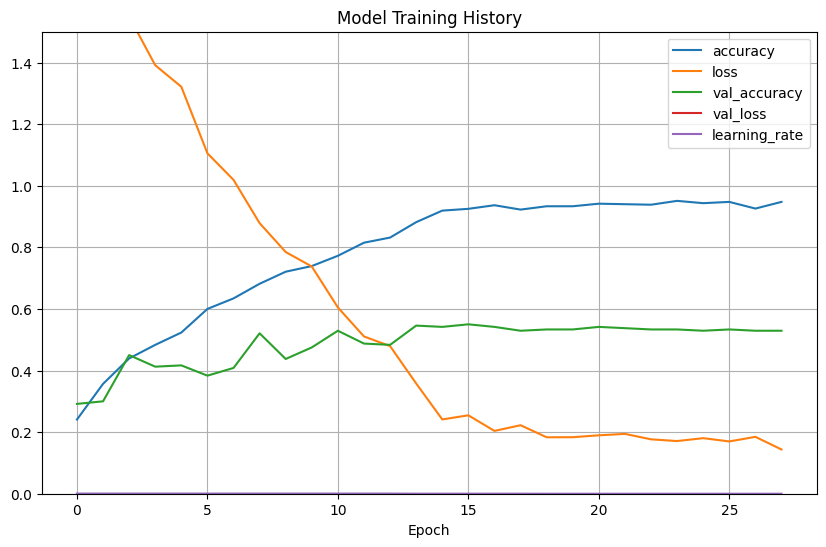


Test Accuracy (1D CNN on MFCC+Chroma): 52.08%
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


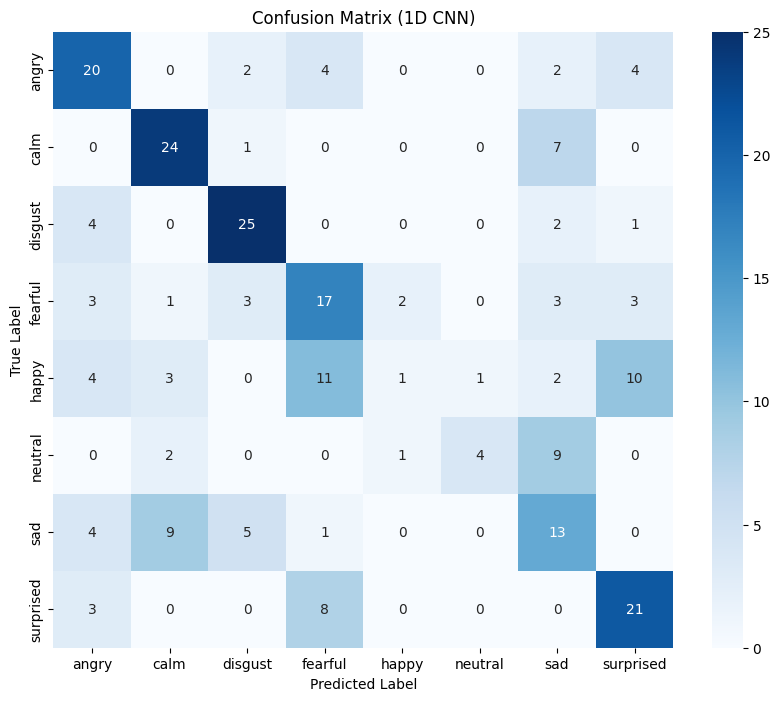

1D CNN model saved to cnn_1d_sequence_model.h5


In [ ]:
# After augmentation + zcr and rms. (increasing patience)

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'cnn_1d_sequence_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Found classes: {class_names}")
print(f"Final training data shape: {X_train.shape}")


def create_1d_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First block
    model.add(Conv1D(128, kernel_size=9, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Second block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    # Third block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    # We remove the final pooling layer here to preserve more of the sequence length
    model.add(Dropout(0.4))
    
    # Flatten and Classify
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# --- Training the Model ---
cnn_1d_model = create_1d_cnn_model(X_train.shape[1:], num_classes)
cnn_1d_model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

print("\n--- Training 1D CNN Model ---")
history = cnn_1d_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating 1D CNN Model ---")

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = cnn_1d_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (1D CNN on MFCC+Chroma): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(cnn_1d_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (1D CNN)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Saving the model
cnn_1d_model.save(MODEL_SAVE_PATH)
print(f"1D CNN model saved to {MODEL_SAVE_PATH}")

--- Loading and Preprocessing Sequence Data ---
Found classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Final training data shape: (1884, 174, 27)


/home/manas/Desktop/ML_SpeechEmotion (Copy)/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-14 18:09:44.530154: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 174, 128)       │        31,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 174, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 87, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 87, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 43, 256)        │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 43, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 11008)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,818,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,739,400 (14.26 MB)

 Trainable params: 3,738,120 (14.26 MB)

 Non-trainable params: 1,280 (5.00 KB)


--- Training 1D CNN Model ---
Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.2516 - loss: 2.4990 - val_accuracy: 0.4245 - val_loss: 1.7122 - learning_rate: 5.0000e-04
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3270 - loss: 1.7305 - val_accuracy: 0.4401 - val_loss: 1.6985 - learning_rate: 5.0000e-04
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4055 - loss: 1.5433 - val_accuracy: 0.4167 - val_loss: 1.4546 - learning_rate: 5.0000e-04
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4708 - loss: 1.4138 - val_accuracy: 0.5182 - val_loss: 1.3723 - learning_rate: 5.0000e-04
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5122 - loss: 1.3105 - val_accuracy: 0.4740 - val_loss: 1.3395 - learning_rate: 5.0000e-04
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5504 - loss: 1.2157 - val_accuracy: 0.5469 - val_loss: 1.2692 - learning_rate: 5.0000e-04
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━

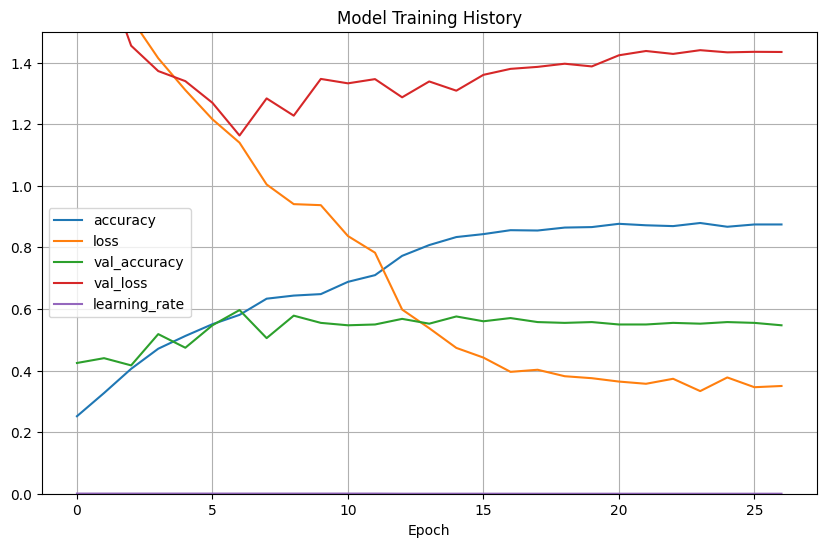


Test Accuracy (1D CNN on MFCC+Chroma): 59.64%
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


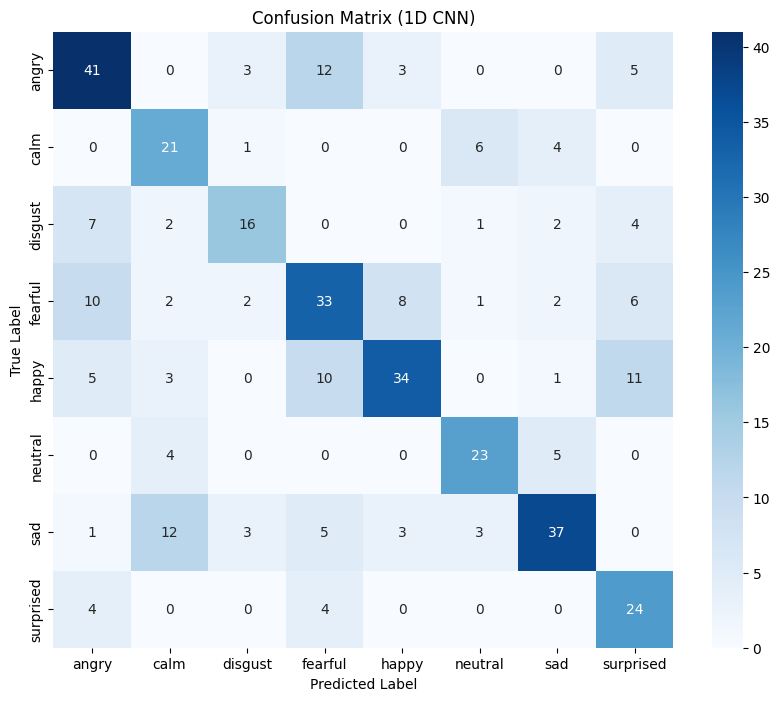

1D CNN model saved to cnn_1d_sequence_model.h5


In [ ]:
# After augmentation + zcr and rms. (increasing patience)
# Added songs to the dataset

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'cnn_1d_sequence_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Found classes: {class_names}")
print(f"Final training data shape: {X_train.shape}")


def create_1d_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First block
    model.add(Conv1D(128, kernel_size=9, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Second block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    # Third block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    # We remove the final pooling layer here to preserve more of the sequence length
    model.add(Dropout(0.4))
    
    # Flatten and Classify
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# --- Training the Model ---
cnn_1d_model = create_1d_cnn_model(X_train.shape[1:], num_classes)
cnn_1d_model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

print("\n--- Training 1D CNN Model ---")
history = cnn_1d_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating 1D CNN Model ---")

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = cnn_1d_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (1D CNN on MFCC+Chroma): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(cnn_1d_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (1D CNN)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Saving the model
cnn_1d_model.save(MODEL_SAVE_PATH)
print(f"1D CNN model saved to {MODEL_SAVE_PATH}")

--- Loading and Preprocessing Sequence Data ---
Found classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Final training data shape: (1884, 174, 27)


/home/manas/Desktop/ML_SpeechEmotion (Copy)/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 174, 128)       │        31,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 174, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 87, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 87, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 43, 256)        │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 43, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 11008)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,818,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,739,400 (14.26 MB)

 Trainable params: 3,738,120 (14.26 MB)

 Non-trainable params: 1,280 (5.00 KB)


--- Training 1D CNN Model ---
Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.2404 - loss: 2.5514 - val_accuracy: 0.3516 - val_loss: 1.6690 - learning_rate: 5.0000e-04
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.3493 - loss: 1.7210 - val_accuracy: 0.4167 - val_loss: 1.6255 - learning_rate: 5.0000e-04
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4066 - loss: 1.5775 - val_accuracy: 0.3932 - val_loss: 1.5743 - learning_rate: 5.0000e-04
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4687 - loss: 1.4027 - val_accuracy: 0.5208 - val_loss: 1.3898 - learning_rate: 5.0000e-04
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5175 - loss: 1.3076 - val_accuracy: 0.5677 - val_loss: 1.2788 - learning_rate: 5.0000e-04
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5674 - loss: 1.1668 - val_accuracy: 0.5286 - val_loss: 1.2439 - learning_rate: 5.0000e-04
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━

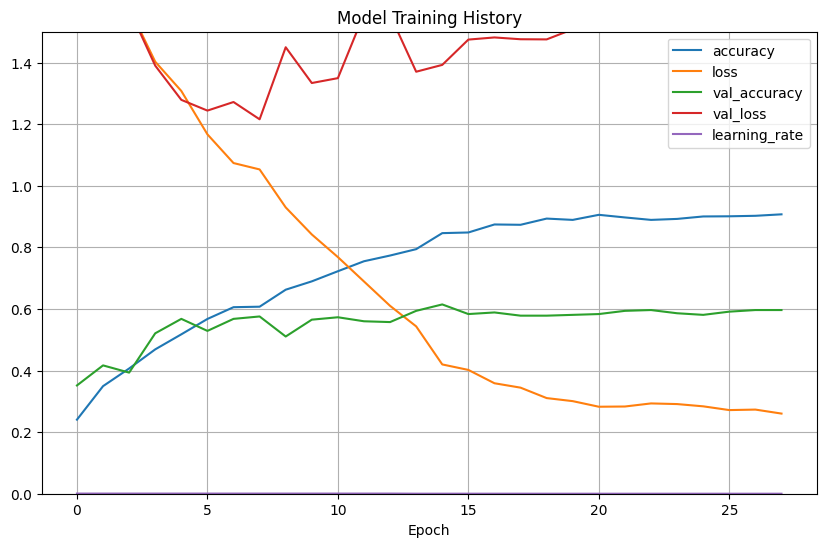


Test Accuracy (1D CNN on MFCC+Chroma): 57.55%
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


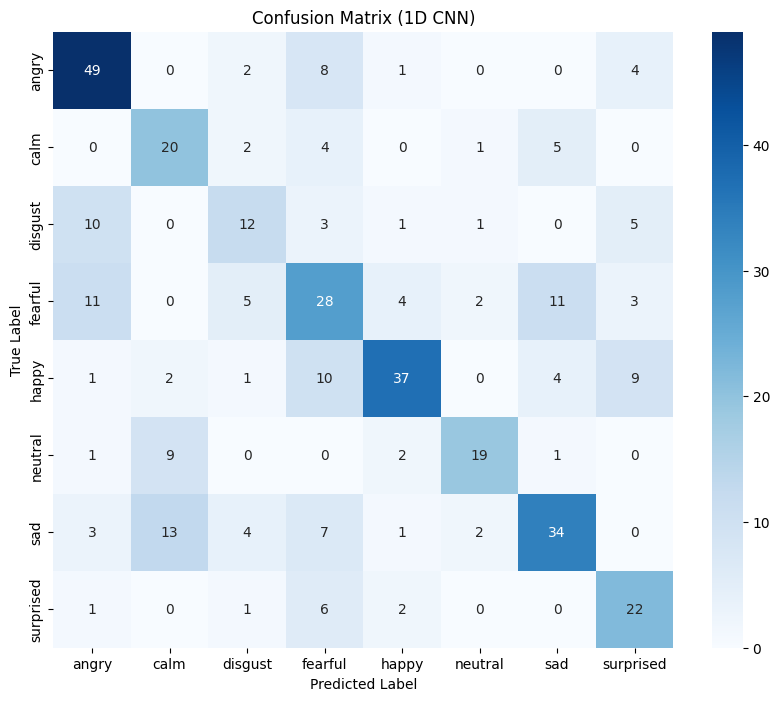

1D CNN model saved to cnn_1d_sequence_model.h5


In [4]:
# After augmentation + zcr and rms. (increasing patience)
# Added songs to the dataset

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'cnn_1d_sequence_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Found classes: {class_names}")
print(f"Final training data shape: {X_train.shape}")


def create_1d_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First block
    model.add(Conv1D(128, kernel_size=9, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Second block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    # Third block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    # We remove the final pooling layer here to preserve more of the sequence length
    model.add(Dropout(0.4))
    
    # Flatten and Classify
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# --- Training the Model ---
cnn_1d_model = create_1d_cnn_model(X_train.shape[1:], num_classes)
cnn_1d_model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

print("\n--- Training 1D CNN Model ---")
history = cnn_1d_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating 1D CNN Model ---")

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = cnn_1d_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (1D CNN on MFCC+Chroma): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(cnn_1d_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (1D CNN)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Saving the model
cnn_1d_model.save(MODEL_SAVE_PATH)
print(f"1D CNN model saved to {MODEL_SAVE_PATH}")

--- Loading and Preprocessing Sequence Data ---
Found classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Final training data shape: (1884, 174, 30)


/home/manas/Desktop/ML_SpeechEmotion (Copy)/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 174, 128)       │        34,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 174, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 87, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 87, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 43, 256)        │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 43, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 11008)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,818,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,742,856 (14.28 MB)

 Trainable params: 3,741,576 (14.27 MB)

 Non-trainable params: 1,280 (5.00 KB)


--- Training 1D CNN Model ---
Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.2389 - loss: 2.4924 - val_accuracy: 0.4271 - val_loss: 1.7199 - learning_rate: 5.0000e-04
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.3609 - loss: 1.7353 - val_accuracy: 0.4427 - val_loss: 1.6505 - learning_rate: 5.0000e-04
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.4230 - loss: 1.5865 - val_accuracy: 0.4557 - val_loss: 1.4165 - learning_rate: 5.0000e-04
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.4814 - loss: 1.4001 - val_accuracy: 0.5130 - val_loss: 1.3063 - learning_rate: 5.0000e-04
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.5133 - loss: 1.2968 - val_accuracy: 0.4870 - val_loss: 1.2661 - learning_rate: 5.0000e-04
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.5600 - loss: 1.1997 - val_accuracy: 0.5156 - val_loss: 1.2104 - learning_rate: 5.0000e-04
Epoch 7/100
59/59 ━━━━━━━━━

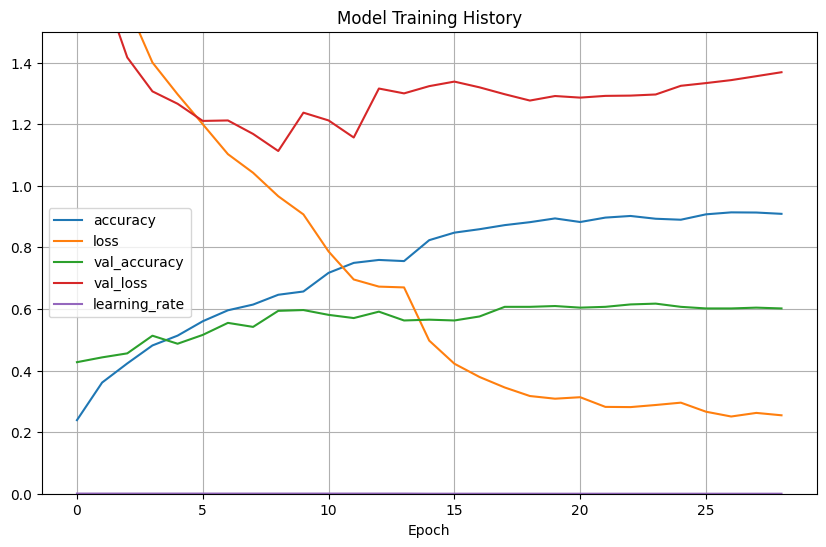


Test Accuracy (1D CNN on MFCC+Chroma): 59.38%
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


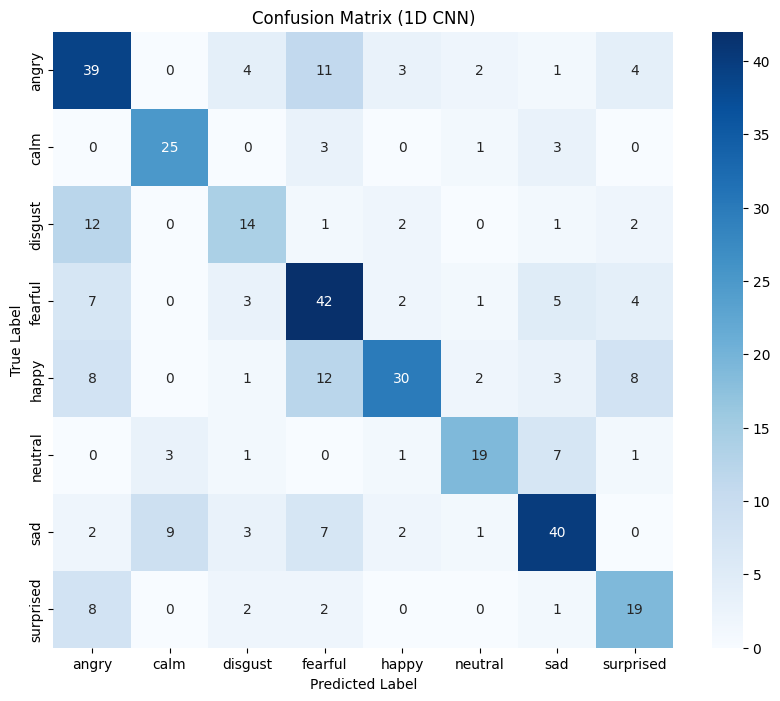

1D CNN model saved to cnn_1d_sequence_model.h5


In [6]:
# After augmentation + zcr and rms. (increasing patience)
# Added songs to the dataset
# Adding spectral features (Centroid, Bandwidth, Rolloff)

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'cnn_1d_sequence_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Found classes: {class_names}")
print(f"Final training data shape: {X_train.shape}")


def create_1d_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First block
    model.add(Conv1D(128, kernel_size=9, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Second block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    # Third block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    # We remove the final pooling layer here to preserve more of the sequence length
    model.add(Dropout(0.4))
    
    # Flatten and Classify
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# --- Training the Model ---
cnn_1d_model = create_1d_cnn_model(X_train.shape[1:], num_classes)
cnn_1d_model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

print("\n--- Training 1D CNN Model ---")
history = cnn_1d_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating 1D CNN Model ---")

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = cnn_1d_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (1D CNN on MFCC+Chroma): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(cnn_1d_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (1D CNN)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Saving the model
cnn_1d_model.save(MODEL_SAVE_PATH)
print(f"1D CNN model saved to {MODEL_SAVE_PATH}")

--- Loading and Preprocessing Sequence Data ---
Found classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Final training data shape: (1884, 174, 30)


/home/manas/Desktop/ML_SpeechEmotion (Copy)/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-15 10:56:40.859017: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 174, 128)       │        34,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 174, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 87, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 87, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 43, 256)        │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 43, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 11008)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,818,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,742,856 (14.28 MB)

 Trainable params: 3,741,576 (14.27 MB)

 Non-trainable params: 1,280 (5.00 KB)


--- Training 1D CNN Model ---
Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.2718 - loss: 2.5317 - val_accuracy: 0.3958 - val_loss: 1.6979 - learning_rate: 5.0000e-04
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.3588 - loss: 1.7176 - val_accuracy: 0.3385 - val_loss: 1.5761 - learning_rate: 5.0000e-04
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.4214 - loss: 1.5441 - val_accuracy: 0.4349 - val_loss: 1.4804 - learning_rate: 5.0000e-04
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.4687 - loss: 1.3815 - val_accuracy: 0.5182 - val_loss: 1.2832 - learning_rate: 5.0000e-04
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.5133 - loss: 1.3247 - val_accuracy: 0.5052 - val_loss: 1.3120 - learning_rate: 5.0000e-04
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.5584 - loss: 1.1873 - val_accuracy: 0.5365 - val_loss: 1.3082 - learning_rate: 5.0000e-04
Epoch 7/100
59/59 ━━━━━━━━

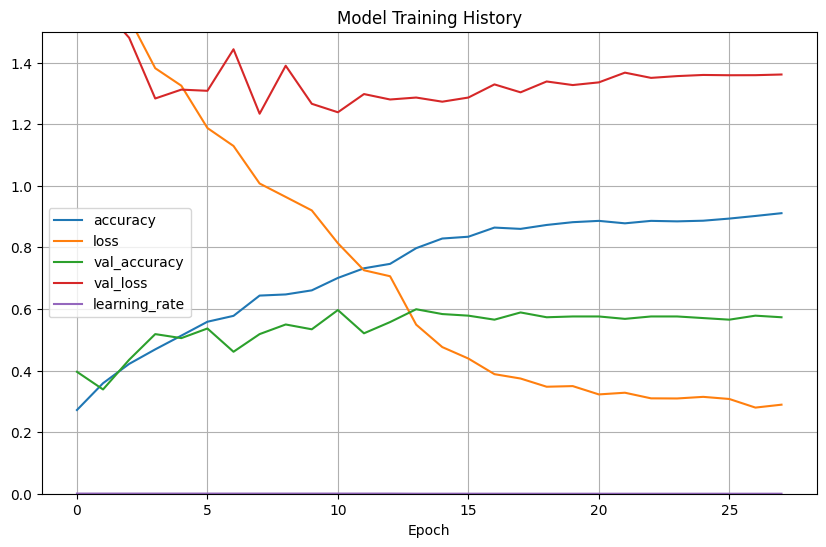


Test Accuracy (1D CNN on MFCC+Chroma): 51.82%
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


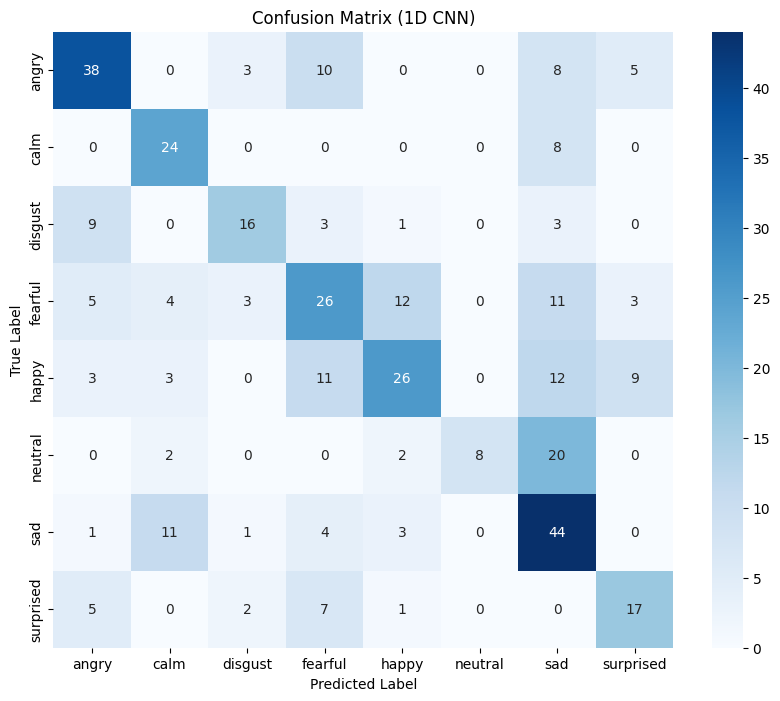


--- Saving the Trained Model and Preprocessing Objects ---
Model saved to cnn_1d_sequence_model.h5
Scaler saved to scaler.pkl
Encoder classes saved to encoder_classes.npy


In [2]:
# After augmentation + zcr and rms. (increasing patience)
# Added songs to the dataset
# Adding spectral features (Centroid, Bandwidth, Rolloff)

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'cnn_1d_sequence_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Found classes: {class_names}")
print(f"Final training data shape: {X_train.shape}")


def create_1d_cnn_model(input_shape, num_classes):
    model = Sequential()

    # First block
    model.add(Conv1D(128, kernel_size=9, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    # Second block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    # Third block
    model.add(Conv1D(256, kernel_size=9, activation='relu', padding='same'))
    model.add(BatchNormalization())
    # We remove the final pooling layer here to preserve more of the sequence length
    model.add(Dropout(0.4))
    
    # Flatten and Classify
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# --- Training the Model ---
cnn_1d_model = create_1d_cnn_model(X_train.shape[1:], num_classes)
cnn_1d_model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

print("\n--- Training 1D CNN Model ---")
history = cnn_1d_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=EPOCHS, batch_size=BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating 1D CNN Model ---")

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = cnn_1d_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (1D CNN on MFCC+Chroma): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(cnn_1d_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (1D CNN)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 8. SAVE THE TRAINED MODEL AND PREPROCESSING OBJECTS
print("\n--- Saving the Trained Model and Preprocessing Objects ---")
cnn_1d_model.save(MODEL_SAVE_PATH)
print(f"Model saved to {MODEL_SAVE_PATH}")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved to scaler.pkl")

# Save the label encoder classes
np.save('encoder_classes.npy', le.classes_)
print("Encoder classes saved to encoder_classes.npy")